# Model Training Notebook

In [12]:
# system libraries
import os
import sys

# data-science libraries
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

import torch

# add models folder to system path for importing
sys.path.insert(0, 'models')

# to save dataset and weights
import pickle

## Select Torch Device

In [13]:
device = torch.device("mps")

## Data Preparation

### Load Previously Saved Dataset

In [15]:
with open('datasets/dataset_1.pickle', 'rb') as file:
    dataset = pickle.load(file)

### Split Songs into Train and Valid

In [16]:
num_train_files = 10
end_idx = np.sum(dataset.file_lengths[:10])
train_dataset = torch.utils.data.Subset(dataset, np.arange(end_idx))
valid_dataset = torch.utils.data.Subset(dataset, np.arange(end_idx, len(dataset)))

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
valid_dataloader = torch.utils.data.DataLoader(valid_dataset, batch_size=64, shuffle=True)

In [17]:
dataset[0][0].shape

torch.Size([68])

In [18]:
dataset[0][1].shape

torch.Size([48])

In [19]:
dataset[0][0][0]

tensor(0.)

In [20]:
print(f"Length of train + length of valid == length of full? {len(train_dataset) + len(valid_dataset) == len(dataset)}")

Length of train + length of valid == length of full? True


## Model

In [34]:
from exp3 import *

def train():
    model.train(True)
    epoch_loss = 0
    for (data, target) in train_dataloader:
        optimizer.zero_grad()
        data, target = data.to(device), target.to(device)
        out = model(data)
        loss = loss_func(out, target)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    return epoch_loss

def validate():
    model.train(False)
    epoch_loss = 0
    for (data, target) in valid_dataloader:
        data, target = data.to(device), target.to(device)
        out = model(data)
        loss = loss_func(out, target)
        epoch_loss += loss.item()
    return epoch_loss

In [35]:
model = SimpleLinear()
model.to(device)

SimpleLinear(
  (activation): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (linear1): Linear(in_features=68, out_features=1024, bias=True)
  (linear2): Linear(in_features=1024, out_features=512, bias=True)
  (linear3): Linear(in_features=512, out_features=256, bias=True)
  (linear4): Linear(in_features=256, out_features=128, bias=True)
  (linear5): Linear(in_features=128, out_features=64, bias=True)
  (linear6): Linear(in_features=64, out_features=48, bias=True)
)

In [36]:
loss_func = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

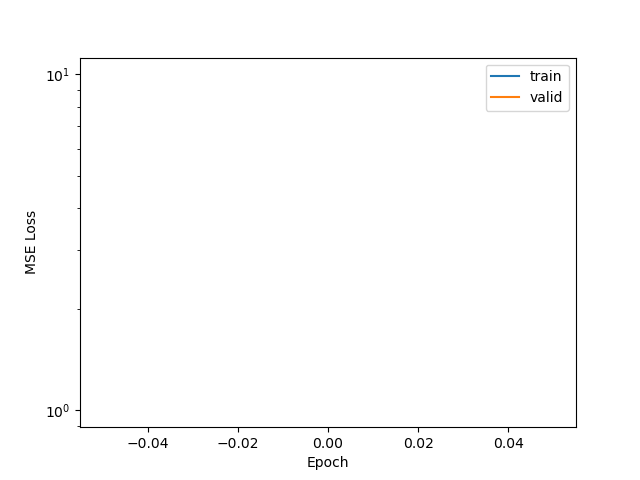

In [37]:
full_train_loss_history = []
full_valid_loss_history = []

fig, ax = plt.subplots()
ax.set(xlabel="Epoch", ylabel="MSE Loss")
ax_loss_train, = ax.semilogy([], [], color="C0", label="train")
ax_loss_valid, = ax.semilogy([], [], color="C1", label="valid")
ax.legend()
# fig.tight_layout()

In [38]:
for epoch in range(5000):
    full_train_loss_history.append(train() / len(train_dataloader.dataset))
    ax_loss_train.set_data(np.arange(1, len(full_train_loss_history)+1), full_train_loss_history)
    
    full_valid_loss_history.append(validate() / len(valid_dataloader.dataset))
    ax_loss_valid.set_data(np.arange(1, len(full_valid_loss_history)+1), full_valid_loss_history)
    
    ax.relim()
    ax.autoscale_view()
    fig.canvas.draw()

KeyboardInterrupt: 

## Save Model

In [ ]:
 # torch.save(model.state_dict(), "weights/exp3.pt")